# **Spatial Patterns of insect Diversity in continetal Ecuador**

## **Completeness analysis**

Author: Daning Montaño - Ocampo

# **1. Packages and libraries**

In [199]:
library(dplyr)
library(ggplot2)
library(sf)
library(iNEXT)
library(tidyr)
library(vegan)
library(tibble)
#library(doParallel)
#

# 2. Load clean data and grids

In [200]:
insects_records = read.csv("Data/Records/insects_records_clean.csv")

# Transform to sf object
insects_records_sf = st_as_sf(insects_records, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)


In [201]:
insects_records_sf

Simple feature collection with 106818 features and 17 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34
5          9          BNDB    BNDB_979 e7f27209-8604-44de-b43e-4fe8abc2f67c
6         11          BNDB    BNDB_982 8b392663-4188-4e7b-b521-0980ea4d4403
7         13          BNDB    BNDB_985 b7f21191-056b-4024-a0d5-f678dfb20773
8         15          BNDB    BNDB_988 14c6e35a-b276-4320-aedf-3cf0cd79b875
9         17          BNDB    BNDB_990 090cfbfa-0c2f-4462-b1d4-1947399a3946
10        19          B

In [202]:
grid_10km = st_read("Data/shp/grid_10km.shp")
grid_10km$id_10km = grid_10km$id
grid_10km = grid_10km %>% select(-id)
grid_2km = st_read("Data/shp/grid_2km.shp")
grid_2km$id_2km = grid_2km$id
grid_2km = grid_2km %>% select(-id)

Reading layer `grid_10km' from data source 
  `C:\PROYECTOS\Spatial_patterns_insects\CODIGOS\Data\shp\grid_10km.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 7268 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
Reading layer `grid_2km' from data source 
  `C:\PROYECTOS\Spatial_patterns_insects\CODIGOS\Data\shp\grid_2km.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 116350 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.01119 ymin: -5.022759 xmax: -75.15773 ymax: 1.454985
Geodetic CRS:  WGS 84


# 3. Join points to grids

We are going to extract the ID of each square in the 10 km grid using the 2 km grid, so that we can link them. 

First we extract centroids from grid 2km to avoid problems with the boundaries of the grid

In [203]:
centroides_2km = grid_2km %>% st_centroid()
centroides_2km

Warning message:
st_centroid assumes attributes are constant over geometries 


Simple feature collection with 116350 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.00216 ymin: -5.013713 xmax: -75.16678 ymax: 1.445938
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_2km                   geometry
1  498760.1 10160820 500760.1 10158820      1 POINT (-81.00216 1.445938)
2  498760.1 10158820 500760.1 10156820      2 POINT (-81.00216 1.427843)
3  498760.1 10156820 500760.1 10154820      3 POINT (-81.00216 1.409749)
4  498760.1 10154820 500760.1 10152820      4 POINT (-81.00216 1.391654)
5  498760.1 10152820 500760.1 10150820      5  POINT (-81.00216 1.37356)
6  498760.1 10150820 500760.1 10148820      6 POINT (-81.00216 1.355465)
7  498760.1 10148820 500760.1 10146820      7 POINT (-81.00216 1.337371)
8  498760.1 10146820 500760.1 10144820      8 POINT (-81.00216 1.319276)
9  498760.1 10144820 500760.1 10142820      9 POINT (-81.00216 1.301182)
10 498760.1 10142820 500760.1 10140820     10 POINT 

We create a spatial features with id froms 10 km grids

In [204]:
centroids_2km_with_10km_id <- st_join(centroides_2km, 
  grid_10km %>% select(id_10km), 
  join = st_intersects)

Join the information extracted by centroids with the original grid_2km using the id_2km

In [205]:
grid_2km$id_10km = centroids_2km_with_10km_id$id_10km

By locating the points, we will extract ID information from the grid tables. This allows us to work on the analyses and simply join the results to the grid, making the process more efficient.

In [206]:
grid_2km

Simple feature collection with 116350 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.01119 ymin: -5.022759 xmax: -75.15773 ymax: 1.454985
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_2km                       geometry
1  498760.1 10160820 500760.1 10158820      1 POLYGON ((-81.01115 1.45498...
2  498760.1 10158820 500760.1 10156820      2 POLYGON ((-81.01115 1.43689...
3  498760.1 10156820 500760.1 10154820      3 POLYGON ((-81.01115 1.41879...
4  498760.1 10154820 500760.1 10152820      4 POLYGON ((-81.01115 1.40070...
5  498760.1 10152820 500760.1 10150820      5 POLYGON ((-81.01115 1.38260...
6  498760.1 10150820 500760.1 10148820      6 POLYGON ((-81.01115 1.36451...
7  498760.1 10148820 500760.1 10146820      7 POLYGON ((-81.01115 1.34641...
8  498760.1 10146820 500760.1 10144820      8 POLYGON ((-81.01115 1.32832...
9  498760.1 10144820 500760.1 10142820      9 POLYGON ((-81.01115 1.31022...
10 498760.

In [207]:
recors_grid_2km <- st_join(
  insects_records_sf,
  grid_2km %>% select(id_2km, id_10km),   
  join = st_within                              # inside polygons
)
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34
5          9          BNDB    BNDB_979 e7f27209-8604-44de-b43e-4fe8abc2f67c
6         11          BNDB    BNDB_982 8b392663-4188-4e7b-b521-0980ea4d4403
7         13          BNDB    BNDB_985 b7f21191-056b-4024-a0d5-f678dfb20773
8         15          BNDB    BNDB_988 14c6e35a-b276-4320-aedf-3cf0cd79b875
9         17          BNDB    BNDB_990 090cfbfa-0c2f-4462-b1d4-1947399a3946
10        19          B

# 4. Records per 10 km grid

We calculate the number of records per 10 km grid usind id_10km

In [208]:
total_records_per_grid = recors_grid_2km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  summarise(Total_records = n()) %>%
  as.data.frame()


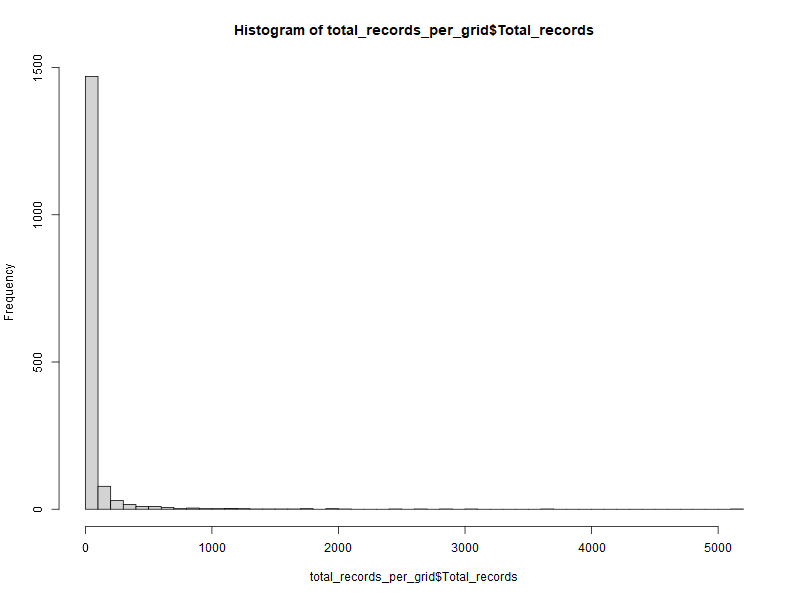

In [209]:
hist(total_records_per_grid$Total_records, breaks = 50)

Join results to 10 km grid

In [210]:
grid_10km = grid_10km%>% 
  left_join(total_records_per_grid, by = "id_10km")

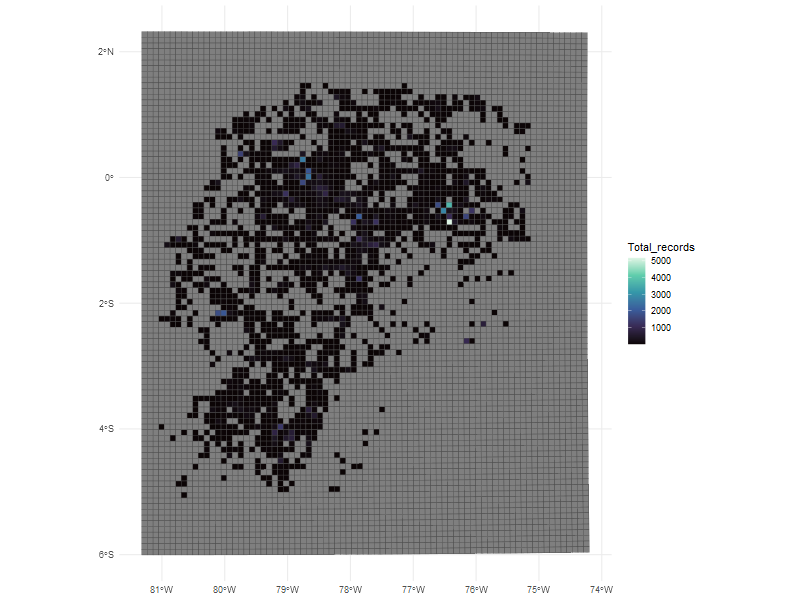

In [211]:
ggplot(grid_10km) +
  geom_sf(aes(fill = Total_records), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

# 5. Sp per 10 km grid

In [212]:
total_genus_per_grid = recors_grid_2km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  distinct(genus) %>%
  summarise(Total_genus = n()) %>%
  as.data.frame()
total_genus_per_grid

    id_10km Total_genus
1       327           3
2       346           1
3       406          35
4       419           7
5       497           4
6       498           6
7       503          29
8       504           5
9       505          72
10      510          13
11      511          11
12      512           2
13      532           8
14      589         102
15      590           2
16      592           1
17      593           3
18      595          29
19      597           5
20      598          28
21      599           3
22      600           2
23      601           1
24      603           4
25      604           1
26      632           8
27      681          10
28      682           3
29      687           1
30      688           1
31      690           6
32      691           2
33      693           1
34      715           1
35      723           2
36      724           1
37      726           1
38      771           6
39      774           5
40      775           2
41      777     

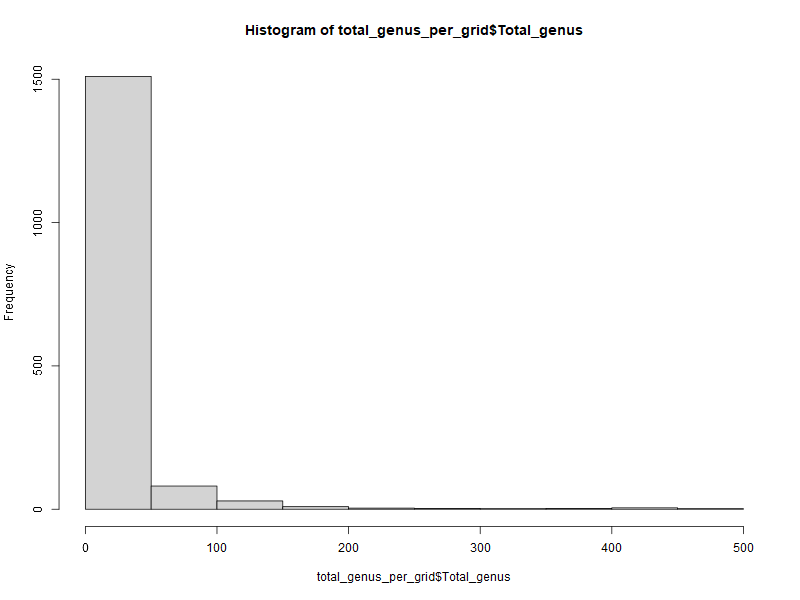

In [213]:
hist(total_genus_per_grid$Total_genus)

In [214]:
grid_10km = grid_10km%>% 
  left_join(total_genus_per_grid, by = "id_10km")
grid_10km

Simple feature collection with 7268 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_10km Total_records Total_genus
1  464459.9 10256386 474459.9 10246386       1            NA          NA
2  464459.9 10246386 474459.9 10236386       2            NA          NA
3  464459.9 10236386 474459.9 10226386       3            NA          NA
4  464459.9 10226386 474459.9 10216386       4            NA          NA
5  464459.9 10216386 474459.9 10206386       5            NA          NA
6  464459.9 10206386 474459.9 10196386       6            NA          NA
7  464459.9 10196386 474459.9 10186386       7            NA          NA
8  464459.9 10186386 474459.9 10176386       8            NA          NA
9  464459.9 10176386 474459.9 10166386       9            NA          NA
10 464459.9 10166386 474459.9 10156386      10       

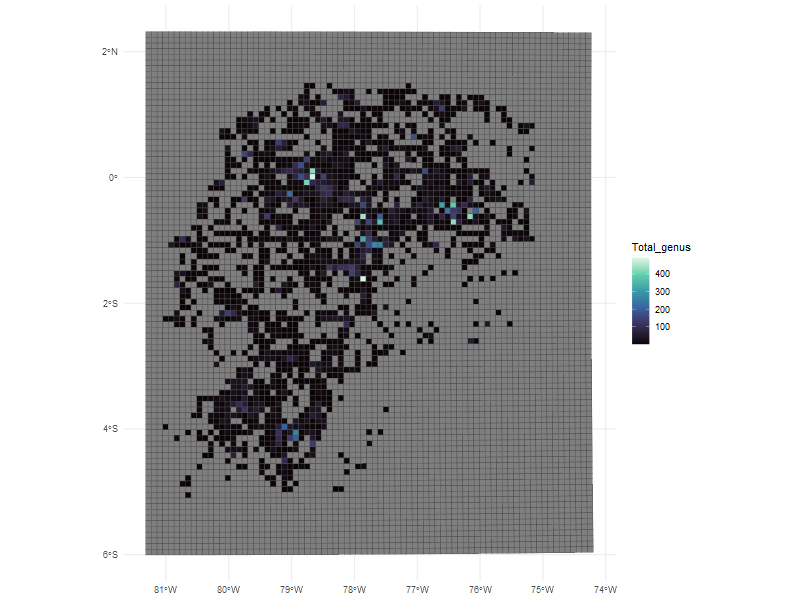

In [215]:
ggplot(grid_10km) +
  geom_sf(aes(fill = Total_genus), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

## 5.1 Correlaction records x sp

In [216]:
cor(grid_10km$Total_records, grid_10km$Total_genus, method = "spearman", use = "complete.obs")

[1] 0.9491338

Warning messages:
1: Removed 5621 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 5621 rows containing missing values or values outside the scale range
(`geom_point()`). 


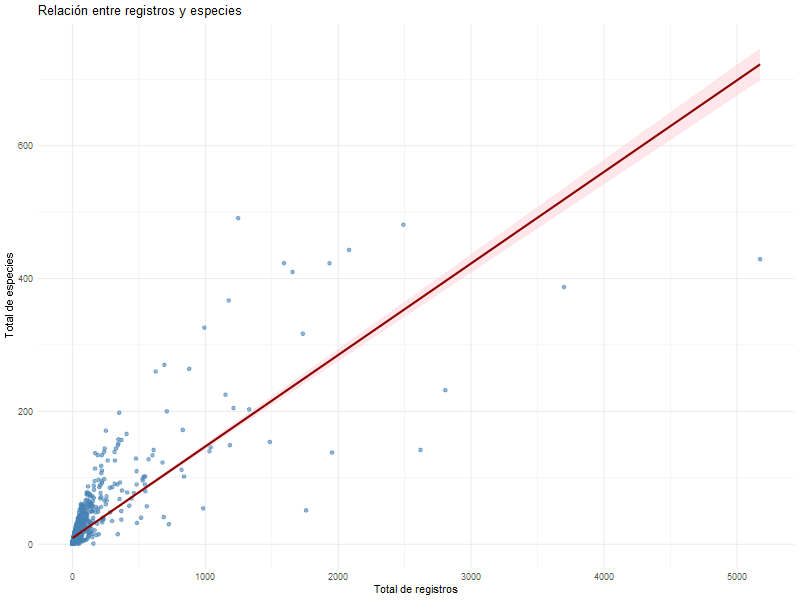

`geom_smooth()` using formula = 'y ~ x'

In [217]:
ggplot(grid_10km, aes(x = Total_records, y = Total_genus)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", fill = "pink") +
  theme_minimal() +
  labs(
    x = "Total de registros",
    y = "Total de especies",
    title = "Relación entre registros y especies"
  )

# 6. Sampling Completness

## 6.1. Completness - Country level

Calculate completnes for all country using incidens data and each 10 km cell is a unit

In [218]:
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34
5          9          BNDB    BNDB_979 e7f27209-8604-44de-b43e-4fe8abc2f67c
6         11          BNDB    BNDB_982 8b392663-4188-4e7b-b521-0980ea4d4403
7         13          BNDB    BNDB_985 b7f21191-056b-4024-a0d5-f678dfb20773
8         15          BNDB    BNDB_988 14c6e35a-b276-4320-aedf-3cf0cd79b875
9         17          BNDB    BNDB_990 090cfbfa-0c2f-4462-b1d4-1947399a3946
10        19          B

In [219]:
ecu_incidens_matrix <- recors_grid_2km %>%
  as.data.frame() %>%
  distinct(id_10km, genus) %>%          # 1 por unidad-especie
  mutate(val = 1L) %>%
  pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
  arrange(id_10km)
ids_unidades_ecu <- ecu_incidens_matrix$id_10km

# Quitamos la columna de IDs para dejar solo 0/1 por especie
incidences_ecu_df <- ecu_incidens_matrix %>% dplyr::select(-id_10km)

# Matriz of incidences - iNext
inext_in_ecu <- list(ensamblaje = as.data.frame(t(incidences_ecu_df)))




Use iNEXT funtion to calculate the sampling coverage in Ecuador, an only extract richness (q=0) and sampling coverage

In [220]:
result_inext_ecu <- iNEXT(inext_in_ecu, q = 0, datatype = "incidence_raw", se = TRUE, conf = 0.95,nboot= 200 )

In [221]:
result_inext_ecu

Compare 1 assemblages with Hill number order q = 0.
$class: iNEXT

$DataInfo: basic data information
  Assemblage    T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8 Q9 Q10
1 ensamblaje 1648 29984  4304 0.9477 1570 662 389 249 189 150 135 102 75  71

$iNextEst: diversity estimates with rarefied and extrapolated samples.
$size_based (LCL and UCL are obtained for fixed size.)

   Assemblage    t        Method Order.q         qD   qD.LCL     qD.UCL
1  ensamblaje    1   Rarefaction       0   18.19417   17.998   18.39035
10 ensamblaje  824   Rarefaction       0 3279.67012 3244.839 3314.50076
20 ensamblaje 1648      Observed       0 4304.00000 4250.291 4357.70854
30 ensamblaje 2429 Extrapolation       0 4917.13617 4844.843 4989.42897
40 ensamblaje 3296 Extrapolation       0 5364.23946 5267.564 5460.91458
           SC     SC.LCL     SC.UCL
1  0.01983418 0.01924252 0.02042583
10 0.90797023 0.90588767 0.91005279
20 0.94766554 0.94579119 0.94953988
30 0.96491188 0.96277361 0.96705015
40 0.

In [222]:
info_inext_ecu <- DataInfo(inext_in_ecu, datatype = "incidence_raw")  # columna SC = sample coverage; T = # unidades de muestreo


In [223]:
info_inext_ecu

  Assemblage    T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8 Q9 Q10
1 ensamblaje 1648 29984  4304 0.9477 1570 662 389 249 189 150 135 102 75  71

Warning message:
In ggiNEXT.iNEXT(result_inext_ecu, type = 2) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


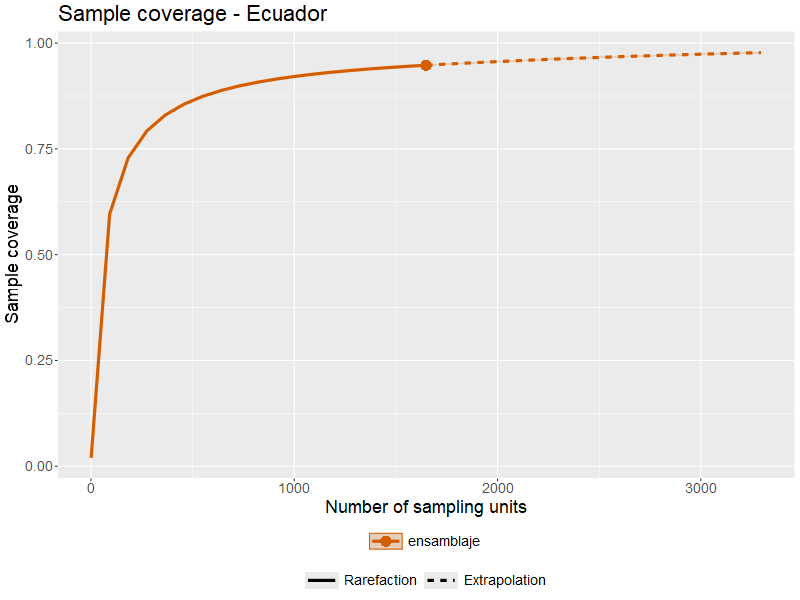

In [224]:
plot_units_sc <- ggiNEXT(result_inext_ecu, type = 2) + labs(title = "Sample coverage - Ecuador")
plot_units_sc

Warning message:
In ggiNEXT.iNEXT(result_inext_ecu, type = 1) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


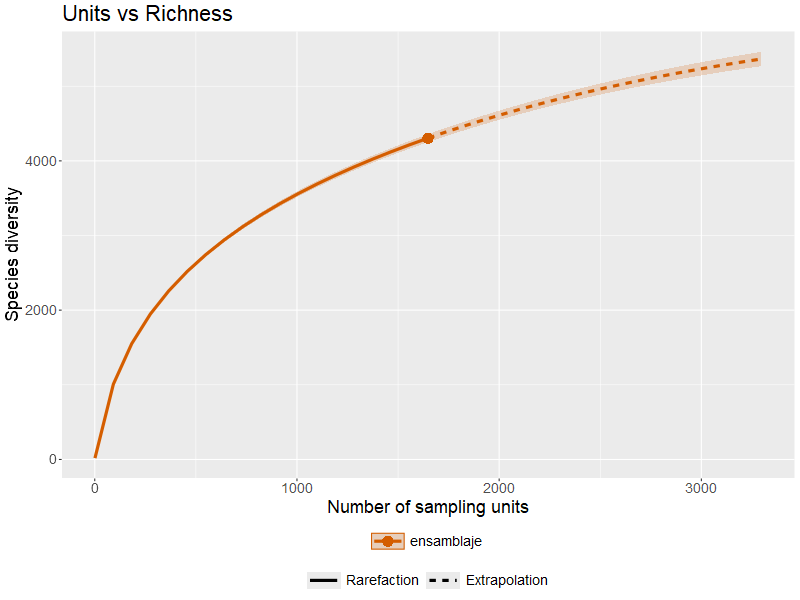

In [225]:
plot_units_richness <- ggiNEXT(result_inext_ecu, type = 1) + labs(title = "Units vs Richness")
plot_units_richness

## 6.2. Grid

### 6.2.1 Sample coverage

Calculamos la completitud de la muestra usando el paquete iNEXT. Para esto se usarán las incidencias de las especies, y dentro de cada grid de 10 km, cada celda de 2 km es una unidad, en done evaluamos como el incluir unidades cambia la cobertura de la muestra

In [226]:
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34
5          9          BNDB    BNDB_979 e7f27209-8604-44de-b43e-4fe8abc2f67c
6         11          BNDB    BNDB_982 8b392663-4188-4e7b-b521-0980ea4d4403
7         13          BNDB    BNDB_985 b7f21191-056b-4024-a0d5-f678dfb20773
8         15          BNDB    BNDB_988 14c6e35a-b276-4320-aedf-3cf0cd79b875
9         17          BNDB    BNDB_990 090cfbfa-0c2f-4462-b1d4-1947399a3946
10        19          B

In [406]:

# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container
results_s_cov <- data.frame(
  id_10km = integer(),
  Samplig_coverage = numeric(),  # observed SC
  n_units = numeric(),           # T
  n_incidences = numeric(),      # U
  genus_obs = numeric(),            # S.obs
  Q1 = numeric(),
  Q2 = numeric(),
  sc_ext = numeric(),            # SC at max coverage row
  n_units_ext = numeric(),       # t at max coverage row
  genus_ext = numeric(),            # qD at max coverage row
  stringsAsFactors = FALSE
)

# Progress bar
pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = species, 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1 for iNEXT
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # iNEXT input
  inext_grid_2km <- list(ensamblaje = as.data.frame(t(incidens_matrix_2km_df)))

  # Run iNEXT and extract metrics
  sampl_result <- tryCatch({
    result_inext_2km_grid <- iNEXT(
      inext_grid_2km,
      q = 0,
      datatype = "incidence_raw",
      se = FALSE
    )

    sc_obs      <- result_inext_2km_grid$DataInfo$SC
    n_units_obs <- result_inext_2km_grid$DataInfo$T
    n_incid     <- result_inext_2km_grid$DataInfo$U
    genus_obs      <- result_inext_2km_grid$DataInfo$S.obs
    Q1          <- result_inext_2km_grid$DataInfo$Q1
    Q2          <- result_inext_2km_grid$DataInfo$Q2

    cb <- result_inext_2km_grid$iNextEst$coverage_based
    sc_ext      <- if (!is.null(cb)) tail(cb$SC, 1) else NA_real_
    n_units_ext <- if (!is.null(cb)) tail(cb$t,  1) else NA_real_
    genus_ext      <- if (!is.null(cb)) tail(cb$qD, 1) else NA_real_

    data.frame(
      Samplig_coverage = sc_obs,
      n_units = n_units_obs,
      n_incidences = n_incid,
      genus_obs = genus_obs,
      Q1 = Q1,
      Q2 = Q2,
      sc_ext = sc_ext,
      n_units_ext = n_units_ext,
      genus_ext = round(genus_ext, 0),
      stringsAsFactors = FALSE
    )
  }, error = function(e) {
    data.frame(
      Samplig_coverage = NA_real_,
      n_units = NA_real_,
      n_incidences = NA_real_,
      genus_obs = NA_real_,
      Q1 = NA_real_,
      Q2 = NA_real_,
      sc_ext = NA_real_,
      n_units_ext = NA_real_,
      genus_ext = NA_real_,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_s_cov <- rbind(
    results_s_cov,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

  count <- count + 1
  setTxtProgressBar(pb, count)
}

# Close progress bar
close(pb)



  |======================================================================| 100%

There were 50 or more warnings (use warnings() to see the first 50)


In [407]:
results_s_cov

    id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1      2149           0.1948       4           27        25  23  2 0.35731935
2      4633           0.5017       4           58        45  34  9 0.73989689
3      4444           0.0692       8           33        32  31  1 0.13505533
4      4073           0.0741       2           26        26  26  0 0.21319265
5      4448           0.1705       6           14        13  12  1 0.31865019
6      5089           0.1756       4           15        14  13  1 0.32507449
7      2417           0.1526      11           72        67  62  5 0.28932200
8      3888           0.0599       6           40        39  38  1 0.11714331
9      3143           0.8333       5           48        28  12 12 0.97805213
10     3157           0.0370       5           14        14  14  0 0.20263439
11     2238           0.5342       5           51        39  28 10 0.79514225
12     2807               NA      NA           NA        NA  NA 

In [408]:
View(results_s_cov)

### 6.2.2. Species accumulation curve - Slope

In [409]:
# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container
results_slope <- data.frame(
  id_10km = integer(),
  slope = numeric()  # observed SC
)

# Progress bar
#pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
#count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = species, 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1 for iNEXT
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # iNEXT input
  inext_grid_2km <- as.data.frame(incidens_matrix_2km_df)

  # Run iNEXT and extract metrics
  sampl_result <- tryCatch({
    result_specum_2km_grid <- 
      #max_permutations = factorial(nrow(inext_grid_2km))
      specaccum(inext_grid_2km, method = "random", permutations = 200)
    

    slope = tail(result_specum_2km_grid$richness, 1) - result_specum_2km_grid$richness[length(result_specum_2km_grid$richness) - 1]

    data.frame(
      slope = slope,
      stringsAsFactors = FALSE
    )
  }, error = function(e) {
    data.frame(
      slope = slope,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_slope <- rbind(
    results_slope,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

 # count <- count + 1
  #setTxtProgressBar(pb, count)
}

# Close progress bar
#close(pb)

'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
no actual accumulation since only one site provided
'nperm' >= set of all permutations: co

In [410]:
results_slope

    id_10km      slope
1      2149  5.9130435
2      4633  8.4347826
3      4444  4.0100000
4      4073 10.0000000
5      4448  1.9300000
6      5089  3.0869565
7      2417  6.2800000
8      3888  6.6500000
9      3143  2.3865546
10     3157  2.8151261
11     2238  5.5882353
12     2807  5.5882353
13     3250  4.6450000
14     3248  6.1304348
15     4159  6.1304348
16     2788  6.1700000
17     3060  3.6950000
18     2647  3.6950000
19     3330  4.8150000
20     1448 20.0000000
21     1765  7.4621849
22     4629  5.4000000
23     4266  2.7300000
24     1629  7.5300000
25     4634  5.2436975
26     4632  5.2500000
27     4539  2.3850000
28     4536  3.3781513
29     1538  7.5400000
30     2865 20.0000000
31     3144  2.0250000
32     3001  4.8000000
33     1539  2.0000000
34     1630 13.3913043
35     1724  6.0000000
36     1265  5.4347826
37     1357 18.0000000
38     1624 16.0000000
39     1719  6.5750000
40     1856  6.5750000
41     3354  9.0150000
42     1681  9.0150000
43     1583

### 6.2.3. Sample completeness - Clench

In [411]:
# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container (keep original name/shape, now storing completeness)
results_completeness <- data.frame(
  id_10km = integer(),
  completeness = numeric()  # %
)

# Progress bar (kept commented to preserve your structure)
# pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
# count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = genus, values = 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(
      names_from  = genus,
      values_from = val,
      values_fill = 0
    ) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # Input df
  inext_grid_2km <- as.data.frame(incidens_matrix_2km_df)

  # Compute completeness via Clench on specaccum curve
  sampl_result <- tryCatch({

    # Species accumulation (random average over permutations)
    result_specum_2km_grid <-
      specaccum(inext_grid_2km, method = "random", permutations = 200)

    # Data for fit
    x <- result_specum_2km_grid$sites       # effort (accumulated units)
    y <- result_specum_2km_grid$richness    # accumulated richness
    Sobs <- tail(y, 1)

    # Robust linear start: x/S ≈ 1/a + (b/a)*x
    xy <- x / y
    ok <- is.finite(xy) & is.finite(x) & is.finite(y) & (y > 0)

    if (sum(ok) >= 2) {
      lin_fit <- lm(xy[ok] ~ x[ok])
      c0 <- coef(lin_fit)[1]         # ~ 1/a
      c1 <- coef(lin_fit)[2]         # ~ b/a
      a0 <- if (is.finite(c0) && c0 > 0) 1 / c0 else max(y, na.rm = TRUE)
      b0 <- if (is.finite(c1)) c1 * a0 else 0.1
    } else {
      a0 <- max(y, na.rm = TRUE); b0 <- 0.1
    }

    a0 <- max(a0, .Machine$double.eps)
    b0 <- max(b0, .Machine$double.eps)

    # Reparameterize to enforce a>0, b>0 (stable when ~65% completeness)
    fit <- nls(
      y ~ (exp(aa) * x) / (1 + exp(bb) * x),
      start = list(aa = log(a0), bb = log(b0)),
      control = nls.control(maxiter = 200, tol = 1e-08, minFactor = 1/2^20)
    )

    # Extract parameters and compute S_inf = a/b
    cf <- coef(fit)
    a  <- exp(as.numeric(cf["aa"]))
    b  <- exp(as.numeric(cf["bb"]))
    Sinf <- a / b

    completeness <- if (is.finite(Sinf) && Sinf > 0) 100 * (Sobs / Sinf) else NA_real_
    if (is.finite(completeness)) completeness <- max(0, min(100, completeness))

    data.frame(
      completeness = as.numeric(completeness),
      stringsAsFactors = FALSE
    )

  }, error = function(e) {
    data.frame(
      completeness = NA_real_,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_completeness <- rbind(
    results_completeness,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

  # count <- count + 1
  # setTxtProgressBar(pb, count)
}

# Close progress bar
# close(pb)


'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
no actual accumulation since only one site provided
'nperm' >= set of all permutations: co

In [412]:
results_completeness

    id_10km completeness
1      2149           NA
2      4633    32.127218
3      4444           NA
4      4073           NA
5      4448           NA
6      5089     8.671864
7      2417           NA
8      3888           NA
9      3143           NA
10     3157           NA
11     2238    30.860769
12     2807           NA
13     3250    35.505976
14     3248           NA
15     4159           NA
16     2788           NA
17     3060    13.102918
18     2647           NA
19     3330     9.260403
20     1448           NA
21     1765           NA
22     4629     4.833889
23     4266     9.219082
24     1629           NA
25     4634           NA
26     4632           NA
27     4539           NA
28     4536           NA
29     1538    45.377684
30     2865    19.814099
31     3144    32.202044
32     3001           NA
33     1539           NA
34     1630     9.009630
35     1724           NA
36     1265           NA
37     1357           NA
38     1624           NA
39     1719           NA


### 6.2.4. Ratio Records / Genus

In [413]:
ratio_RG =  data.frame(id_10km = grid_10km$id_10km, ratio_RG = grid_10km$Total_records/grid_10km$Total_genus)
ratio_RG

    id_10km ratio_RG
1         1       NA
2         2       NA
3         3       NA
4         4       NA
5         5       NA
6         6       NA
7         7       NA
8         8       NA
9         9       NA
10       10       NA
11       11       NA
12       12       NA
13       13       NA
14       14       NA
15       15       NA
16       16       NA
17       17       NA
18       18       NA
19       19       NA
20       20       NA
21       21       NA
22       22       NA
23       23       NA
24       24       NA
25       25       NA
26       26       NA
27       27       NA
28       28       NA
29       29       NA
30       30       NA
31       31       NA
32       32       NA
33       33       NA
34       34       NA
35       35       NA
36       36       NA
37       37       NA
38       38       NA
39       39       NA
40       40       NA
41       41       NA
42       42       NA
43       43       NA
44       44       NA
45       45       NA
46       46       NA
47       47  

### 6.2.4  Join Sample covergate with 10 km grid

In [414]:
results_sampling_effor = results_s_cov %>%
  left_join(results_slope, by = "id_10km") %>%
  left_join(results_completeness, by = "id_10km")%>%
  left_join(ratio_RG, by = "id_10km") 

results_sampling_effor

   id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1     2149           0.1948       4           27        25  23  2 0.35731935
2     4633           0.5017       4           58        45  34  9 0.73989689
3     4444           0.0692       8           33        32  31  1 0.13505533
4     4073           0.0741       2           26        26  26  0 0.21319265
5     4448           0.1705       6           14        13  12  1 0.31865019
6     5089           0.1756       4           15        14  13  1 0.32507449
7     2417           0.1526      11           72        67  62  5 0.28932200
8     3888           0.0599       6           40        39  38  1 0.11714331
9     3143           0.8333       5           48        28  12 12 0.97805213
10    3157           0.0370       5           14        14  14  0 0.20263439
11    2238           0.5342       5           51        39  28 10 0.79514225
12    2807               NA      NA           NA        NA  NA NA         NA

In [425]:

results_sampling_effor_flags <- results_sampling_effor %>%
  mutate(
    flag_Samplig_coverage = if_else(!is.na(Samplig_coverage) & Samplig_coverage >= 0.9, 1, 0),
    flag_slope            = if_else(!is.na(slope) & slope <= 1, 1, 0),
    flag_completeness     = if_else(!is.na(completeness) & completeness >= 90, 1, 0),
    flag_ratio_rg         = if_else(!is.na(ratio_RG) & ratio_RG >= 15, 1, 0),
    Total_flags           = flag_Samplig_coverage + flag_slope+flag_completeness  +flag_ratio_rg
  )

results_sampling_effor_flags

   id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1     2149           0.1948       4           27        25  23  2 0.35731935
2     4633           0.5017       4           58        45  34  9 0.73989689
3     4444           0.0692       8           33        32  31  1 0.13505533
4     4073           0.0741       2           26        26  26  0 0.21319265
5     4448           0.1705       6           14        13  12  1 0.31865019
6     5089           0.1756       4           15        14  13  1 0.32507449
7     2417           0.1526      11           72        67  62  5 0.28932200
8     3888           0.0599       6           40        39  38  1 0.11714331
9     3143           0.8333       5           48        28  12 12 0.97805213
10    3157           0.0370       5           14        14  14  0 0.20263439
11    2238           0.5342       5           51        39  28 10 0.79514225
12    2807               NA      NA           NA        NA  NA NA         NA

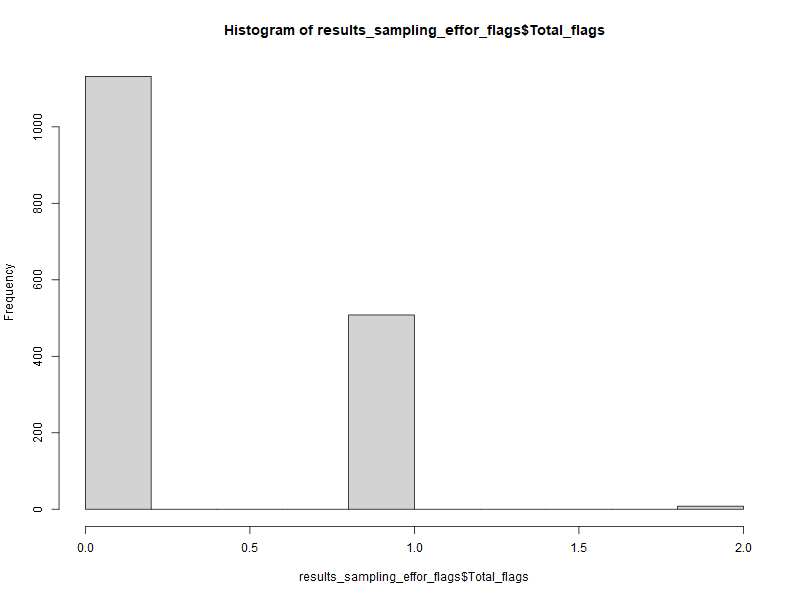

In [426]:
hist(results_sampling_effor_flags$Total_flags)

In [427]:
grid_10km_samping <- grid_10km %>%
  left_join(results_sampling_effor_flags, by = "id_10km") 

grid_10km_samping

Simple feature collection with 7268 features and 24 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_10km Total_records Total_genus
1  464459.9 10256386 474459.9 10246386       1            NA          NA
2  464459.9 10246386 474459.9 10236386       2            NA          NA
3  464459.9 10236386 474459.9 10226386       3            NA          NA
4  464459.9 10226386 474459.9 10216386       4            NA          NA
5  464459.9 10216386 474459.9 10206386       5            NA          NA
6  464459.9 10206386 474459.9 10196386       6            NA          NA
7  464459.9 10196386 474459.9 10186386       7            NA          NA
8  464459.9 10186386 474459.9 10176386       8            NA          NA
9  464459.9 10176386 474459.9 10166386       9            NA          NA
10 464459.9 10166386 474459.9 10156386      10      

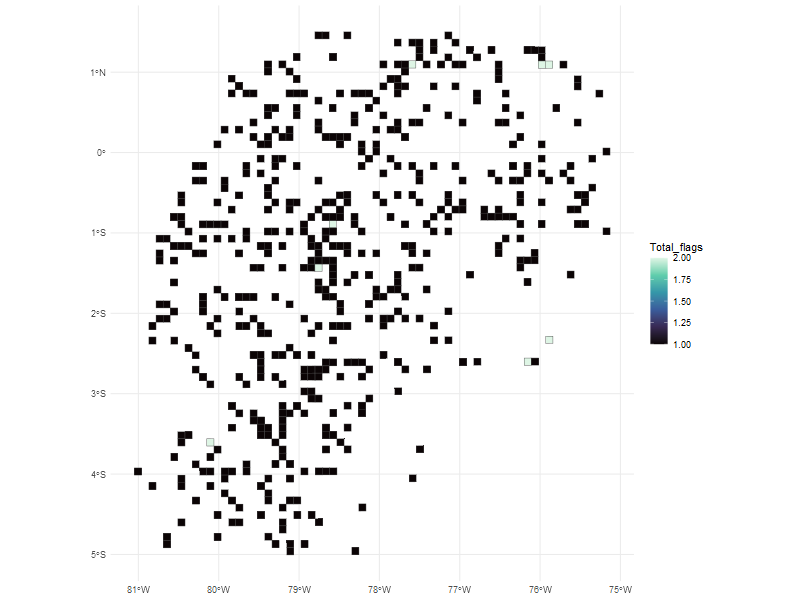

In [431]:
grid_10km_samping_filter = grid_10km_samping %>%
  filter(Total_flags>=1 ) 

ggplot(filtrado) +
geom_sf(aes(fill = Total_flags ), color = "grey30", size = 0.1) +
scale_fill_viridis_c(option = "mako") +
theme_minimal()

# 7. Exportar resultados

In [432]:
write.csv(grid_10km_samping_filter, "Results/shp/grid_10km_samping_filter.csv")